# 121. Best Time to Buy and Sell Stock
Say you have an array for which the ith element is the price of a given stock on day i.

If you were only permitted to complete at most one transaction (i.e., buy one and sell one share of the stock), design an algorithm to find the maximum profit.

Note that you cannot sell a stock before you buy one.
<div class="alert alert-block alert-info">
Example 1:

Input: [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
             Not 7-1 = 6, as selling price needs to be larger than buying price.
Example 2:

Input: [7,6,4,3,1]
Output: 0
Explanation: In this case, no transaction is done, i.e. max profit = 0.

</div>

## Approach 1: Brute Force
We need to find out the maximum difference (which will be the maximum profit) between two numbers in the given array. Also, the second number (selling price) must be larger than the first one (buying price).

In formal terms, we need to find max(prices[j]−prices[i]), for every i and j such that j>i.

## Approach 2: One Pass

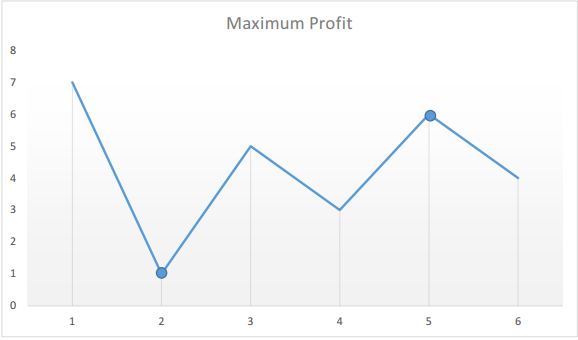

In [1]:
def maxProfit(prices):
    buy_min,profit_max = float('inf'),0
    for p in prices:
        if p < buy_min:
            buy_min = p
        profit_max = max(profit_max,p-buy_min)
    return profit_max

print(maxProfit([7, 1, 5, 3, 6, 4]))                

5


## 122. Best Time to Buy and Sell Stock II
You may complete as many transactions as you like (i.e., buy one and sell one share of the stock multiple times).
<div class="alert alert-block alert-info">
Example 1:

Input: [7,1,5,3,6,4]
Output: 7
Explanation: Buy on day 2 (price = 1) and sell on day 3 (price = 5), profit = 5-1 = 4.
             Then buy on day 4 (price = 3) and sell on day 5 (price = 6), profit = 6-3 = 3.
</div>

## Approach 1: Brute Force
In this case, we simply calculate the profit corresponding to all the possible sets of transactions and find out the maximum profit out of them.

* Time complexity : O(n^n)
Recursive function is called n^n times.
* Space complexity : O(n). Depth of recursion is n. 

## Approach 2: Peak Valley Approach

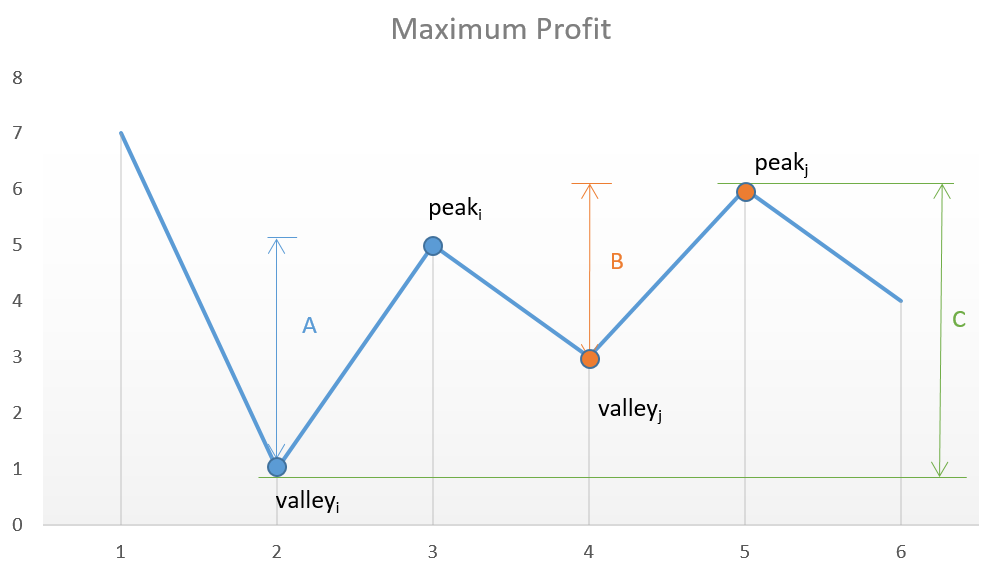

If we analyze the graph, we notice that the points of interest are the consecutive valleys and peaks. The key point is we need to consider every peak immediately following a valley to maximize the profit. In case we skip one of the peaks (trying to obtain more profit), we will end up losing the profit over one of the transactions leading to an overall lesser profit.

Complexity Analysis

* Time complexity : O(n). Single pass.

* Space complexity : O(1). Constant space required. 

## Approach 3: Greedy
Since we can transaction as many as we want, we can gain profit from every stock price increase.
Suppose [xi,xi+1,...xj] is a range of increasing price, we can buy at i and sell at j.
So whenver prices[i] > prices[i-1], we add price[i]-price[i-1] to our profit.

In [2]:
def maxProfit(prices):
    if prices == []: 
        return 0
    localMin = prices[0]
    localMax = prices[0]
    i,n = 0,len(prices)       
    maxProfit = 0
    while i < n -1:
        #find local min
        while (i < n -1) and (prices[i] >= prices[i+1]):
            i +=1
        localMin = prices[i]
        # find local max
        while (i < n-1 ) and (prices[i] <= prices[i+1]):
            i +=1
        localMax = prices[i]
        maxProfit += (localMax - localMin)
    return maxProfit

def maxProfit_greedy(self, prices):
    return sum(prices[i+1]-prices[i] for i in range(len(prices)-1) if prices[i+1]>prices[i])


print(maxProfit([7,1,5,3,6,4]))

7
